## Import Libraries and Read Data as csv format

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

df=pd.read_csv('Data.csv')



In [46]:
df.head(5)

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [47]:
X=df.drop(columns='ADR_label', axis=1)
y=df['ADR_label']
print(X.isna().sum())
messages=X.copy()

UserId     0
TweetId    0
Tweet      0
dtype: int64


In [48]:
y.value_counts()

0    16694
1     6822
Name: ADR_label, dtype: int64

Importing NLTK Libraries to preprocess Text data.
Convert to lower case
Remove Stopwords
Stemming words
Use TF-IDF  to get most frequent and important words that considered for model building.

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikas.shivakumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

messages['Tweet'][0]

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


## Function to Reuse if needed
def preprocess(text):
    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages['Tweet'][i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [52]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Tweet'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

tf = TfidfVectorizer(max_features=2500,ngram_range=(1,3))

# Fit the model
tf_transformer = tf.fit(corpus)

# Dump the file
# To use the same vocab during prediction
pickle.dump(tf_transformer, open("tfidf1.pkl", "wb"))

In [53]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=2500,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [54]:
X[0].shape

(2500,)

### Now We have extracted 2500 features from the Input Data.

In [12]:
X.shape

(23516, 2500)

In [13]:
y.shape

(23516,)

In [55]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [31]:
(y_train[y_train==1].value_counts()/y_train.shape[0])*100

1    28.94954
Name: ADR_label, dtype: float64

In [56]:
y_test.shape[0]

7761

In [141]:
## View The data of train and test split

In [34]:
print('X', X.shape)
print('y', y.shape)
print('y Percentage for 1s', (y[y==1].value_counts()/y.shape[0])*100)
print('y Percentage for 0s', (y[y==0].value_counts()/y.shape[0])*100)
print('--')
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('y_train Percentage for 1s', (y_train[y_train==1].value_counts()/y_train.shape[0])*100)
print('y_train Percentage for 0s', (y_train[y_train==0].value_counts()/y_train.shape[0])*100)
print('--')
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print('y_test Percentage for 1s', (y_test[y_test==1].value_counts()/y_test.shape[0])*100)
print('y_test Percentage for 0s', (y_test[y_test==0].value_counts()/y_test.shape[0])*100)

X (23516, 4000)
y (23516,)
y Percentage for 1s 1    29.010036
Name: ADR_label, dtype: float64
y Percentage for 0s 0    70.989964
Name: ADR_label, dtype: float64
--
X_train (15755, 4000)
y_train (15755,)
y_train Percentage for 1s 1    28.94954
Name: ADR_label, dtype: float64
y_train Percentage for 0s 0    71.05046
Name: ADR_label, dtype: float64
--
X_test (7761, 4000)
y_test (7761,)
y_test Percentage for 1s 1    29.132844
Name: ADR_label, dtype: float64
y_test Percentage for 0s 0    70.867156
Name: ADR_label, dtype: float64


In [65]:
from sklearn.metrics import classification_report,confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###### For Text Classification, Naive Bayes Probabilty Algothm and SVM Classifier Looks Good
###### Tried Below Algorithms
1. Random Forest
2. CART
3. Bagging Classifier
4. Gradient Boosting
5. ADA Boost
6. KNN 
7. SVC
8. Naive Bayes
9. Logistic Regression


In [57]:
from sklearn import metrics
import numpy as np
import itertools

In [58]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.naive_bayes import MultinomialNB
NBclassifier=MultinomialNB()

In [76]:
from xgboost import XGBClassifier
XGBclassifier=XGBClassifier()

In [100]:
from sklearn.svm import SVC

In [123]:
SVClassifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [116]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [130]:
rf=RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [132]:
bgc=BaggingClassifier()
bgc.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Based on Text Data, NB and SVM works better. Hence chosen for building model.
Since the classes are imbalanced, considered Recall as a performance measure
We can see XGB has not performed well as it is not a good model for text data.
NB has very less recall score and same goes with XGB and  KNN.
SVM classifier has a good accuracy and recall score.
Neural Netowrk is also considerably doing well based on accuracy and recall.

We can conclude that SVM and Neural Network works best for this data.
For fine tuning, we can actually try Kernel SVM and use hyperparmater tuning and check threshold for AUC curve to fine tune the model.


In [139]:
#Training 
#1 Bagging Classifier

bgc = BaggingClassifier(n_estimators=10)
bgc.fit(X_train,y_train)
pred=bgc.predict(X_test)


Accuracy 0.8461538461538461


<AxesSubplot:>

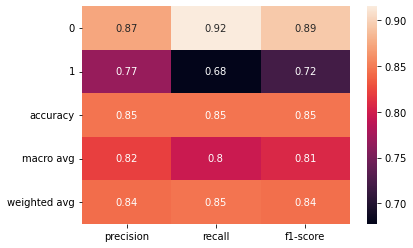

In [142]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)

In [161]:
classes=[0,1]

Normalized confusion matrix


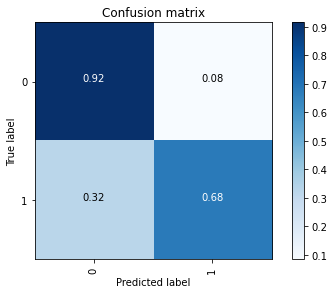

In [162]:

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
plot_confusion_matrix(cm, classes, normalize=True)

In [163]:
print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

Accuracy 0.8461538461538461
AUC Score 0.7965154195649551
F Score 0.7195866604039455
Recall Score 0.6775762936753649


In [164]:
import pickle
pickle.dump(bgc, open("BaggingClassifier.pkl", "wb"))  # save it into a file named save.p

In [61]:
X_train.shape

(15755, 2500)

In [78]:
##2 RandomForest

from sklearn.ensemble import RandomForestClassifier
bgc = RandomForestClassifier(n_estimators=100, max_features=1500, max_depth=50)
bgc.fit(X_train,y_train)
pred=bgc.predict(X_test)


Accuracy 0.8451230511532019
AUC Score 0.7838068031040167
F Score 0.7055365017148457
Recall Score 0.6368863334807607
Normalized confusion matrix
None


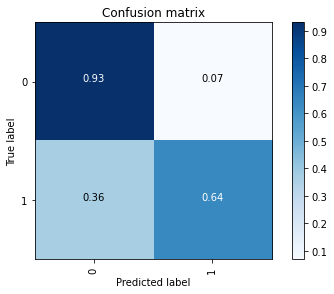

In [79]:
print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


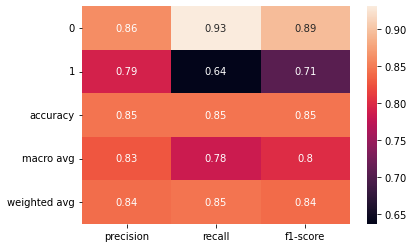

In [80]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)



In [81]:
import pickle
pickle.dump(bgc, open("RandomClassifier.pkl", "wb"))  # save it into a file named save.p

In [83]:
##3 CART

from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier( max_features=1500,criterion='gini',random_state=1,max_depth=50)
cart.fit(X_train,y_train)
pred=cart.predict(X_test)


Accuracy 0.8319804148949878
AUC Score 0.7797433557154919
F Score 0.6941838649155723
Recall Score 0.6545776205218929
Normalized confusion matrix
None


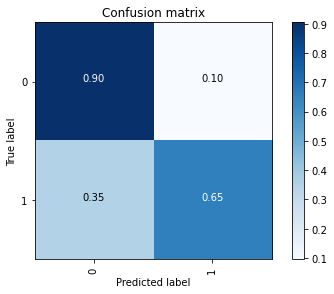

In [84]:
print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


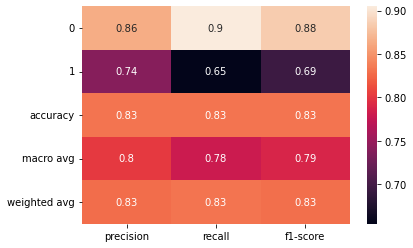

In [85]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)



In [86]:
import pickle
pickle.dump(cart, open("CARTClassifier.pkl", "wb"))  # save it into a file named save.p

In [88]:
xgb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [89]:
##4 Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=20, max_depth=50, max_features=1500)

xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

Accuracy 0.8590387836618992
AUC Score 0.803131920710868
F Score 0.7344660194174757
Recall Score 0.6691729323308271
Normalized confusion matrix
None


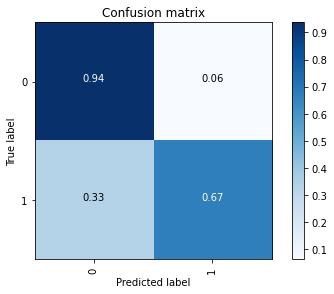

In [90]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


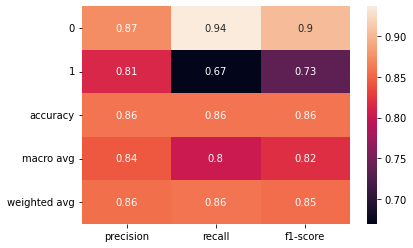

In [91]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

In [92]:
import pickle
pickle.dump(xgb, open("XGBClassifier.pkl", "wb"))  # save it into a file named save.p

In [102]:
##5 KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)


In [95]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Accuracy 0.7693596186058498
AUC Score 0.6147062442201762
F Score 0.38147892190739463
Recall Score 0.24413976116762495
Normalized confusion matrix
None


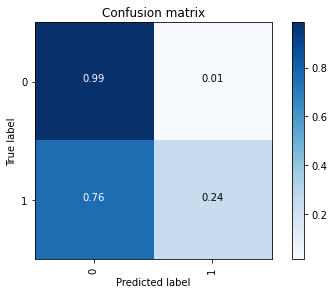

In [103]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


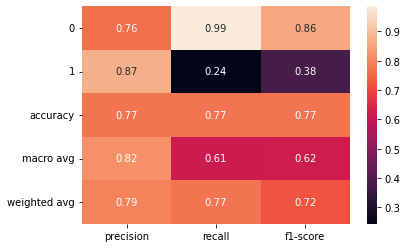

In [104]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

In [105]:
import pickle
pickle.dump(knn, open("KNNClassifier.pkl", "wb"))  # save it into a file named save.p

In [107]:
nbayes.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [108]:
##6 NB Classifier

from sklearn.naive_bayes import MultinomialNB
nbayes = RandomForestClassifier()
nbayes.fit(X_train,y_train)
pred=nbayes.predict(X_test)


Accuracy 0.8750161061718851
AUC Score 0.8119302400385993
F Score 0.7549267306720567
Recall Score 0.6607695709862893
Normalized confusion matrix
None


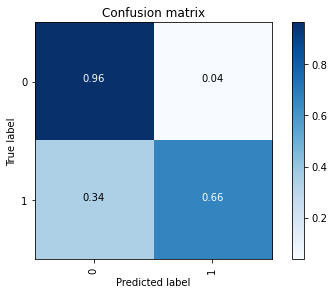

In [109]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


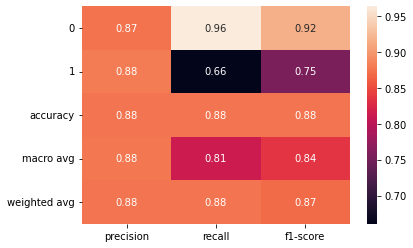

In [110]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

In [111]:
import pickle
pickle.dump(nbayes, open("NaiveBayesClassifier.pkl", "wb"))  # save it into a file named save.p

In [113]:
lr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [114]:
##7 Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
lr = RandomForestClassifier()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)


Accuracy 0.8757892024223682
AUC Score 0.8139082465522094
F Score 0.7574232511323604
Recall Score 0.6656346749226006
Normalized confusion matrix
None


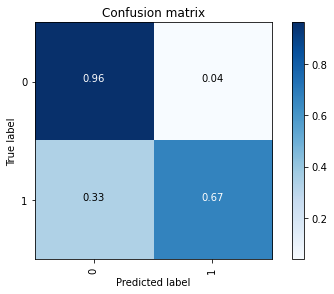

In [115]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


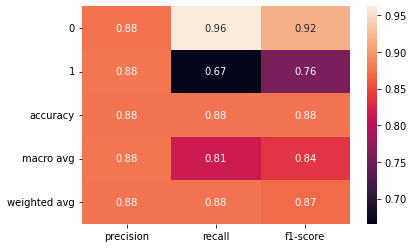

In [116]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

In [117]:
import pickle
pickle.dump(lr, open("LogisticClassifier.pkl", "wb"))  # save it into a file named save.p

In [119]:
svc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [120]:
##8 SVC Classifier

from sklearn.svm import SVC
svc = RandomForestClassifier()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)


Accuracy 0.8779796417987373
AUC Score 0.8168862530658196
F Score 0.762000502638854
Recall Score 0.670499778858912
Normalized confusion matrix
None


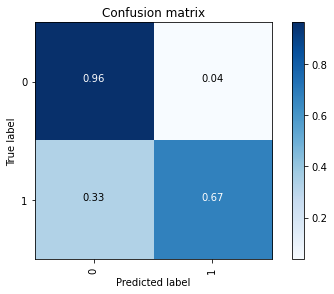

In [121]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


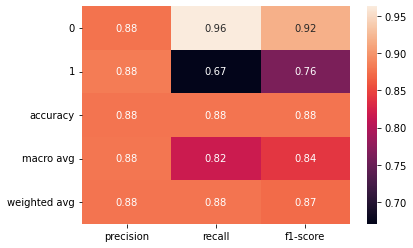

In [122]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

In [123]:
import pickle
pickle.dump(svc, open("SVCClassifier.pkl", "wb"))  # save it into a file named save.p

In [125]:
##9 AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train,y_train)
pred=ada.predict(X_test)


Accuracy 0.8134261048833913
AUC Score 0.7383921032527844
F Score 0.6356316054353297
Recall Score 0.5586023883237505
Normalized confusion matrix
None


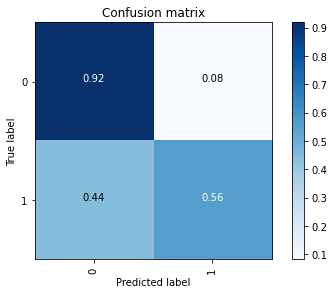

In [126]:

print('Accuracy', metrics.accuracy_score(y_test,pred))
print('AUC Score', metrics.roc_auc_score(y_test,pred))
print('F Score', metrics.f1_score(y_test,pred))
print('Recall Score', metrics.recall_score(y_test,pred))

classes=[0,1]
cm = confusion_matrix(y_test, pred, labels=classes)
cmp=plot_confusion_matrix(cm, classes, normalize=True)
print(cmp)

AxesSubplot(0.125,0.125;0.62x0.755)


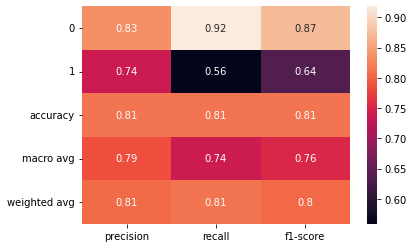

In [127]:
classification_metrics=classification_report(y_test, pred, output_dict=True)
class_metric=sns.heatmap(pd.DataFrame(classification_metrics).iloc[:-1, :].T, annot=True)
print(class_metric)

## Above We have seen Individual Models, now we can finalize 2 or 3 models that gives good performance for hyperparamter tuning and selecting the best model

In [136]:
## Bagging Classifier

def best_param_model_bgc(X_train, y_train):
    bgc=BaggingClassifier()
    param_grid_bgc = {

        'n_estimators':[10,50,100,200]
        

    }
    # Creating an object of the Grid Search class
    grid= GridSearchCV(bgc,param_grid_bgc, verbose=3,cv=2)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters

    n_estimators = grid.best_params_['n_estimators']
   

    # creating a new model with the best parameters
    bgc = BaggingClassifier(n_estimators=n_estimators)
    # training the mew model
    clf=bgc.fit(X_train, y_train)
    return clf
    
 


In [137]:
## Random Forest Classifier

def best_param_model_rf(X_train, y_train):
    rf=RandomForestClassifier()
    param_grid_rf = {

        'criterion': ['gini','entropy'],
        'max_depth': [10,50,75,100],
        'max_features':["auto", "sqrt", "log2"],
        'n_estimators':[10,50,100,200]
        

    }
    # Creating an object of the Grid Search class
    grid= GridSearchCV(rf,param_grid_SVC, verbose=3,cv=2)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
   

    # creating a new model with the best parameters
    rf = RandomForestClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)
    # training the mew model
    clf=rf.fit(X_train, y_train)
    return clf
    
 


In [114]:
## SVC Classifer

def best_param_model_SVC(X_train, y_train):
    SVClassifier=SVC()
    param_grid_SVC = {

        'C': [0.2,0.4,0.6,0.8,1.0],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        

    }
    # Creating an object of the Grid Search class
    grid= GridSearchCV(SVClassifier,param_grid_SVC, verbose=3,cv=2)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    C = grid.best_params_['C']
    kernel = grid.best_params_['kernel']
   

    # creating a new model with the best parameters
    SVClassifier = SVC(C=C, kernel=kernel)
    # training the mew model
    clf=SVClassifier.fit(X_train, y_train)
    return clf
    
 


In [110]:
## XG boost Classifier

def best_param_model_XGBoost(X_train, y_train):
    XGBclassifier=XGBClassifier()
    param_grid_XGBoost = {

        'learning_rate': [0.5, 0.1, 0.01, 0.001],
        'max_depth': [3, 5, 10, 20],
        'n_estimators': [10, 50, 100, 200]

    }
    # Creating an object of the Grid Search class
    grid= GridSearchCV(XGBclassifier,param_grid_XGBoost, verbose=3,cv=2)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    learning_rate = grid.best_params_['learning_rate']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']

    # creating a new model with the best parameters
    XGBclassifier = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
    # training the mew model
    clf=XGBclassifier.fit(X_train, y_train)
    return clf
    
 


In [111]:
## Naive Bayes Classifier

def best_param_model_NB(X_train, y_train):
    NBclassifier=MultinomialNB()
    param_grid_NaiveBayes = {

        'alpha': [0.2, 0.4, 0.6, 0.8,1]

    }
    # Creating an object of the Grid Search class
    grid= GridSearchCV(NBclassifier,param_grid_NaiveBayes, verbose=3,cv=2)
    # finding the best parameters
    grid.fit(X_train, y_train)

    # extracting the best parameters
    alpha = grid.best_params_['alpha']

    # creating a new model with the best parameters
    classifier = MultinomialNB(alpha=alpha)
    # training the mew model
    clf=classifier.fit(X_train, y_train)
    
    return clf


### Comparing SVC and NB with Grid Search and Cross Validation to pick the best model

In [134]:
def get_best_model(X_train,y_train,X_test,y_test):
    

#SVC
    svc=best_param_model_SVC(X_train,y_train)
    prediction_svc = svc.predict(X_test) # Predictions using the XGBoost Model

    if len(y_test.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        svc_score = accuracy_score(y_test, prediction_svc)
    else:
        svc_score = metrics.roc_auc_score(y_test, prediction_svc) # AUC for NB
    

#NAive Bayes
    NB=best_param_model_NB(X_train,y_train)
    prediction_NB = NB.predict(X_test) # Predictions using the XGBoost Model

    if len(y_test.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        NB_score = accuracy_score(y_test, prediction_NB)
    else:
        NB_score = metrics.roc_auc_score(y_test, prediction_NB) # AUC for NB
        
        #comparing the two models
    if(XGB_score <  NB_score):
        return 'Naive Bayes',NB
    else:
        return 'XG Boost',XGB
    
  

In [ ]:
best_model_name,best_model=get_best_model(X_train,y_train,X_test,y_test)

In [143]:
!pip freeze -> requirement_training.txt